| Data | Xi1 | Xi2 | Yi  | αi    |
| ---- | --- | --- | --- | ----- |
| X1   | 4   | 2.9 | 1   | 0.414 |
| X2   | 4   | 4   | 1   | 0     |
| X3   | 1   | 2.5 | -1  | 0     |
| X4   | 2.5 | 1   | -1  | 0.018 |
| X5   | 4.9 | 4.5 | 1   | 0     |
| X6   | 1.9 | 1.9 | -1  | 0     |
| X7   | 3.5 | 4   | 1   | 0.018 |
| X8   | 0.5 | 1.5 | -1  | 0     |
| X9   | 2   | 2.1 | -1  | 0.414 |
| X10  | 4.5 | 2.5 | 1   | 0     |


[25 pts] Support Vector Machines: Given 10 points in Table 1, along with their classes and their Lagrangian multipliers (αi), answer the following questions. The solution is already provided in the lecture slide.

[10 pts] Using NumPy, implement a simple SVM that returns the coefficients of the hyperplane. The simple SVM does not require an SDG approach. The simple SVM has three arguments, X, Y, and α, as simple_SVM(X,Y,alpha). What is the equation of h(x)? Draw the hyperplane with the 10 points.

[10 pts] Write a method that calculates the distance of each point from the hyperplane and returns a binary result if a point is within the margin. If a point is in the margin, the binary result is 1 and 0 otherwise. What is the maximized margin? Return the result in the table format as shown.

| Data | Distance | In Margin? |
| ---- | -------- | ---------- |
| x*1  | D*1      | {0,1}      |
| ⋮    | ⋮        | ⋮          |
| x*10 | D_10     | {0,1}      |

[5 pts] Classify the point z = (3, 3)T using h(x) from above.


We are given a set of 10 points along with their classes and Lagrangian multipliers.
We can solve for the coefficients of the hyperplane using the following algorithm for SVM:
For calculating the weight vector, we have:

w = Σ(αi * yi * xi)

And for calculating the bias, we have:

b = yi - w^T xi

Once we have calculated the weight vector and bias, we can use them to classify new data points using the hyperplane function:

h(x) = w^T x + b

where x is the new data point.

To calculate the distance of each point from the hyperplane, we use the formula:

distance = |h(x)| / ||w||

where ||w|| is the norm of the weight vector.

Finally, to calculate the margin, we need to find the distance between the hyperplane and the closest data point from either class. This can be done by iterating over all the data points and finding the minimum distance for each class.

In [22]:
# imports for project
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
# i have used round to round the decimal calculations to 2 decimal places 
class SVM:
    def __init__(self):
        self.X = None
        self.y = None
        self.alpha = None
        self.b = None
        self.w = None

    def fit(self, X, y, alpha):
        self.X = X
        self.y = y
        self.alpha = alpha
        #calculate weights
        self.w = np.sum(alpha * y * X.T, axis=1)
        #get support vectors
        self.idx = (alpha > 0.0)
        self.supportVectors = X[self.idx]
        self.b = np.mean(y[self.idx] - np.dot(X[self.idx], self.w))
         # Compute the maximum margin
        self.margin = np.round(1/np.linalg.norm(self.w),2)

    def predict(self, X):
        # Compute the SVM output for input data
        distances = np.round(np.abs(np.dot(X, self.w) + self.b) / np.linalg.norm(self.w),2)
        return np.where(distances <= self.margin, np.sign(np.dot(X,self.w)+self.b), -1*np.sign(np.dot(X,self.w)+self.b))
    
    def getDistances(self,X):
        return np.round(( (np.dot(X, self.w) + self.b)) / np.linalg.norm(self.w),2)
    
    def margin_table(self):
        self.distances =  np.round((np.dot(self.X, self.w) + self.b) / np.linalg.norm(self.w),2)
        in_margin = np.array(np.abs(self.distances) <= np.abs(self.margin)).astype(int)
        table = pd.DataFrame({'Data': ['X' + str(i) for i in range(1, len(self.X) + 1)],
                              'Distance': self.distances,
                              'In Margin?': in_margin})
        return table

In [24]:
# initialise data
X = np.array(
    [
        4,
        2.9,
        4,
        4,
        1,
        2.5,
        2.5,
        1,
        4.9,
        4.5,
        1.9,
        1.9,
        3.5,
        4,
        0.5,
        1.5,
        2,
        2.1,
        4.5,
        2.5,
    ]
).reshape(10, 2)
print("X: \n", X)

y = np.array([1, 1, -1, -1, 1, -1, 1, -1, -1, 1])
print("y: \n", y)

alpha = np.array([0.414, 0, 0, 0.018, 0, 0, 0.018, 0, 0.414, 0])
print("alphaLagrange: \n",alpha)


X: 
 [[4.  2.9]
 [4.  4. ]
 [1.  2.5]
 [2.5 1. ]
 [4.9 4.5]
 [1.9 1.9]
 [3.5 4. ]
 [0.5 1.5]
 [2.  2.1]
 [4.5 2.5]]
y: 
 [ 1  1 -1 -1  1 -1  1 -1 -1  1]
alphaLagrange: 
 [0.414 0.    0.    0.018 0.    0.    0.018 0.    0.414 0.   ]


In [25]:
# Run simple SVM
simple_SVM = SVM()
simple_SVM.fit(X, y, alpha)

# Print the coefficients of the hyperplane
print("Coefficients of the hyperplane:")
print("w =", simple_SVM.w)
print("b =", simple_SVM.b)
print("max margin =",simple_SVM.margin)
test = np.array([[3,3]])
result = simple_SVM.predict(test)
print(f'{test} belongs to class {result}')
print(simple_SVM.supportVectors )
margin_table = simple_SVM.margin_table()
print(margin_table)


Coefficients of the hyperplane:
w = [0.846  0.3852]
b = -3.5010000000000003
max margin = 1.08
[[3 3]] belongs to class [1.]
[[4.  2.9]
 [2.5 1. ]
 [3.5 4. ]
 [2.  2.1]]
  Data  Distance  In Margin?
0   X1      1.08           1
1   X2      1.53           0
2   X3     -1.82           0
3   X4     -1.08           1
4   X5      2.56           0
5   X6     -1.25           0
6   X7      1.08           1
7   X8     -2.69           0
8   X9     -1.08           1
9  X10      1.37           0


In [26]:
# Plot the data points
fig, ax = plt.subplots()
ax.scatter(np.array(X)[:, 0], np.array(X)[:, 1], c=y)

# Plot the hyperplane
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 10)
yy = np.linspace(ylim[0], ylim[1], 10)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = simple_SVM.getDistances(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
ax.scatter(simple_SVM.supportVectors[:, 0], simple_SVM.supportVectors[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()


h(x) =  0.8458399565696715 * x1 +  0.3847198697090145 * x2 +  -3.4993196426868427
[[2.5 1. ]
 [2.  2.1]
 [4.  2.9]
 [3.5 4. ]]
1.0761684201544406
   Data  Distance  In Margin?
0   x_1  1.075875           1
1   x_2  1.531301           0
2   x_3  1.820533           0
3   x_4  1.076168           1
4   x_5  2.557553           0
5   x_6  1.249707           0
6   x_7  1.076168           1
7   x_8  2.689689           0
8   x_9  1.075876           1
9  x_10  1.365399           0


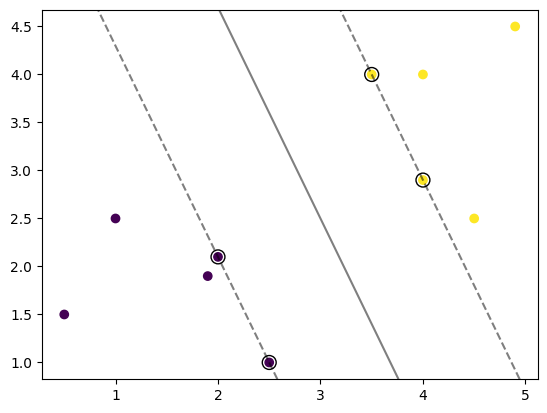

In [28]:
from sklearn.svm import SVC

# Fit the SVM model
clf = SVC(kernel='linear', C=1)
clf.fit(X, y, sample_weight=alpha)

# Get the coefficients of the hyperplane
w = clf.coef_[0]
b = clf.intercept_

# Print the equation of the hyperplane
print("h(x) = ", w[0], "* x1 + ", w[1], "* x2 + ", b[0])
print(clf.support_vectors_)
# Calculate distances from hyperplane and whether they are within margin
distances = np.abs(clf.decision_function(X)) / np.linalg.norm(clf.coef_)
margin = 1 / np.linalg.norm(clf.coef_)
in_margin = (distances <= margin).astype(int)

# Create table
table = pd.DataFrame({
    "Data": [f"x_{i+1}" for i in range(len(X))],
    "Distance": distances,
    "In Margin?": in_margin
})
print(margin)
print(table)
# Plot the hyperplane with the 10 points
import matplotlib.pyplot as plt
import numpy as np

# Plot the data points
fig, ax = plt.subplots()
ax.scatter(np.array(X)[:, 0], np.array(X)[:, 1], c=y)

# Plot the hyperplane
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 10)
yy = np.linspace(ylim[0], ylim[1], 10)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()
